# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import numpy as np # mengimpor numpy library
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns  # Mengimpor pustaka seaborn untuk visualisasi data yang lebih cantik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Untuk normalisasi dan standarisasi
from sklearn.preprocessing import LabelEncoder # Untuk encoding
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA #untuk Principal Component Analysis(pca)
import scipy
from scipy.stats.mstats import winsorize
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

# Tampilkan 10 baris awal
#print(df.head(10))

Mounted at /content/drive


In [3]:
# Memuat dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/synthetic_beverage_sales_data.csv')
df.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

> **1. Memahami Struktur Data**

In [4]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


> **Insight**

Berdasarkan informasi dataset, kolom Order_Date memiliki type data object, yang seharusnya datetime sehingga perlu dilakukan konversi dari object menjadi datetime.

In [5]:
# Konversi kolom Order_Date menjadi Datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%Y-%m-%d')

In [6]:
# Informasi dataset setelah dilakukan konversi pada kolom TransactionDate dan PreviousTransactionDate
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Order_ID       object        
 1   Customer_ID    object        
 2   Customer_Type  object        
 3   Product        object        
 4   Category       object        
 5   Unit_Price     float64       
 6   Quantity       int64         
 7   Discount       float64       
 8   Total_Price    float64       
 9   Region         object        
 10  Order_Date     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 755.3+ MB




> **2. Menangani Data yang Hilang**



In [7]:
# Ambil subset dataset secara acak karena dataset terlalu besar
df = df.sample(n=10000, random_state=69, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       10000 non-null  object        
 1   Customer_ID    10000 non-null  object        
 2   Customer_Type  10000 non-null  object        
 3   Product        10000 non-null  object        
 4   Category       10000 non-null  object        
 5   Unit_Price     10000 non-null  float64       
 6   Quantity       10000 non-null  int64         
 7   Discount       10000 non-null  float64       
 8   Total_Price    10000 non-null  float64       
 9   Region         10000 non-null  object        
 10  Order_Date     10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 859.5+ KB


In [8]:
# Cek nilai yang hilang (missing value) disetiap kolom
print("\nJumlah nilai yang hilang di setiap kolom: ")
df.isnull().sum()


Jumlah nilai yang hilang di setiap kolom: 


,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


> **Insight**


Terlihat bahwa tidak ada missing value pada dataset ini dan semua kolom memiliki jumlah data yang lengkap

> **3. Analisis Distribusi dan Korelasi**



In [9]:
# Menampilkan statistik deskriptif dari dataset
df.describe(include="all")

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000
unique,9987,6367,2,47,4,NaN,NaN,NaN,NaN,16,NaN
top,ORD2706161,CUS4826,B2C,Passion Fruit Juice,Juices,NaN,NaN,NaN,NaN,Schleswig-Holstein,NaN
freq,2,6,6358,404,2584,NaN,NaN,NaN,NaN,659,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.641282,23.310500,0.030600,127.033556,NaN,2022-06-27 02:53:05.280000
min,NaN,NaN,NaN,NaN,NaN,0.330000,1.000000,0.000000,0.380000,NaN,2021-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,1.060000,6.000000,0.000000,8.460000,NaN,2021-09-29 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,1.790000,11.000000,0.000000,21.200000,NaN,2022-06-30 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,3.150000,31.000000,0.050000,70.262500,NaN,2023-03-22 00:00:00
max,NaN,NaN,NaN,NaN,NaN,144.470000,100.000000,0.150000,10858.750000,NaN,2023-12-30 00:00:00


In [10]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns
print("Statistik Deskriptif Variabel Numerik:")
df[numerical_cols].describe()

Statistik Deskriptif Variabel Numerik:


,Unit_Price,Quantity,Discount,Total_Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.641282,23.310500,0.030600,127.033556
std,14.062028,27.034847,0.045319,482.093023
min,0.330000,1.000000,0.000000,0.380000
25%,1.060000,6.000000,0.000000,8.460000
50%,1.790000,11.000000,0.000000,21.200000
75%,3.150000,31.000000,0.050000,70.262500
max,144.470000,100.000000,0.150000,10858.750000


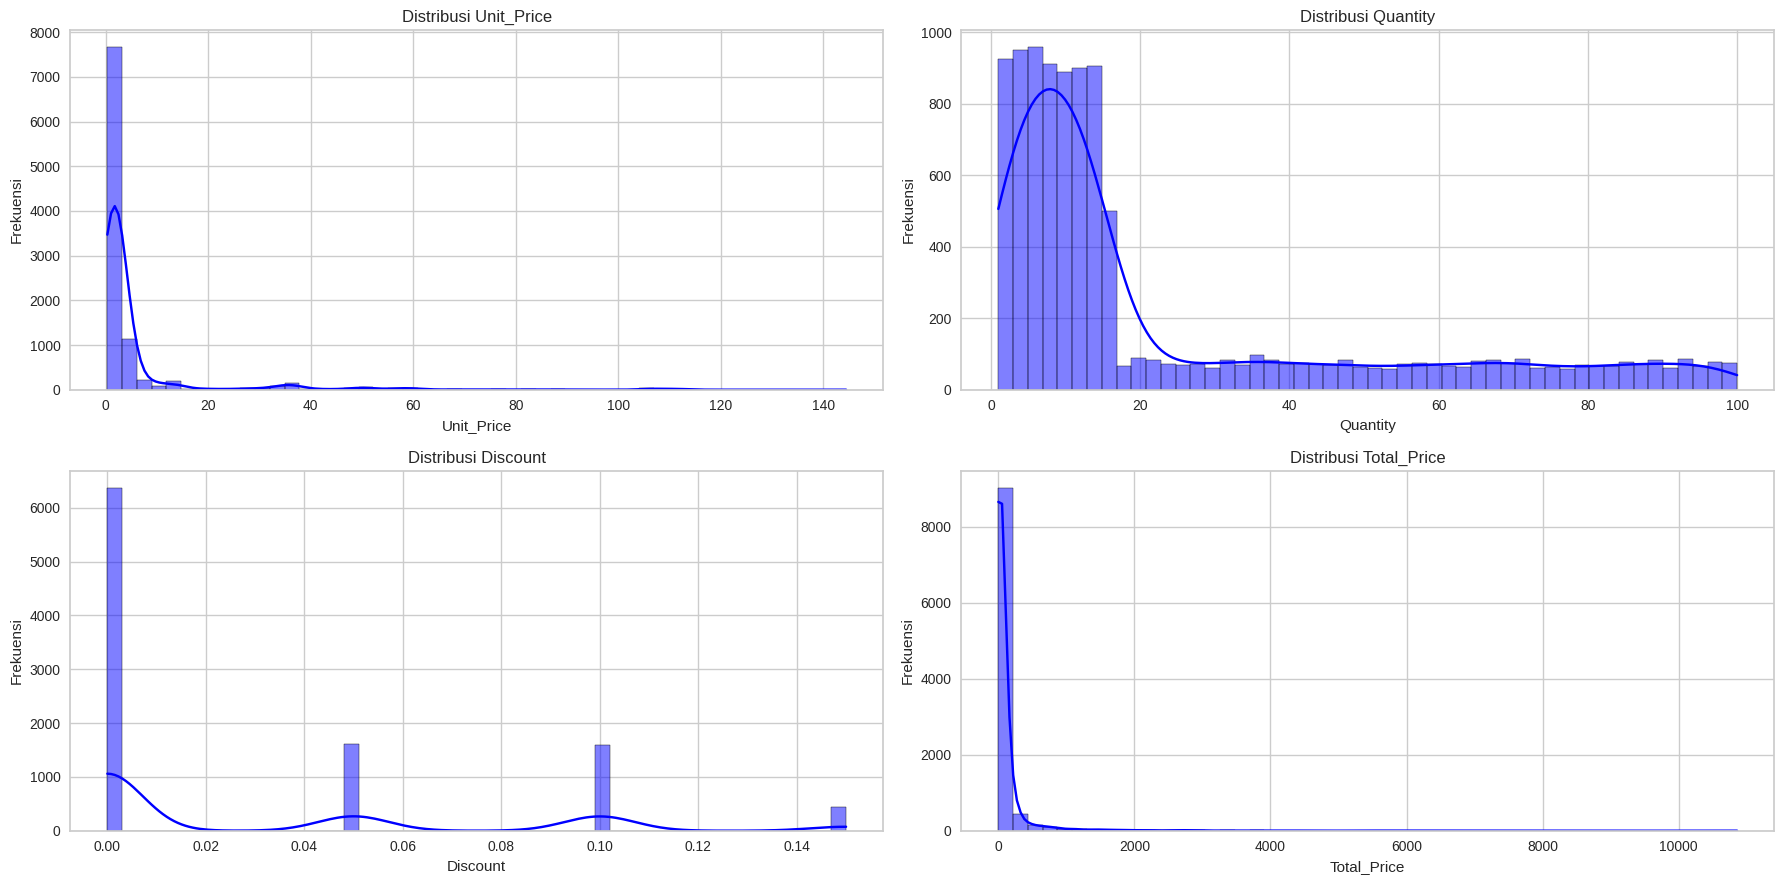

In [11]:
# Membuat subplots dengan 2 baris dan 2 kolom (sesuai jumlah variabel)
fig, axes = plt.subplots(2, 2, figsize=(18, 9))  # Ukuran figure yang lebih compact
axes = axes.flatten()  # Agar lebih mudah mengakses subplot

# Plot masing-masing histogram di subplot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Hapus subplot kosong jika jumlah kolom numerik kurang dari jumlah subplot yang dibuat
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Agar tidak ada overlap antar subplot
plt.show()



*   Distribusi Unit_Price terlihat skewed ke kanan: Nilai-nilai kecil sangat dominan, sementara ada beberapa nilai yang jauh lebih besar (outliers). Standarisasi kurang efektif, sehingga perlu dilakukan normalisasi dengan menggunakan min max scaler.
*   Distribusi Quantity terlihat right skewed (cenderung ke kanan) dan memiliki rentang nilai cukup besar. Sehingga perlu dilakukan normalisasi menggunakan min max scaler.
*   Distribusi Discount terlihat skewed dengan sebagian besar data berada di rentang nilai rendah, dan terdapat nilai yang lebih besar pada rentang tertentu, sehingga mungkin memengaruhi model yang sensitif terhadap skala data. Perlu dilakukan normalisasi.
*   Distribusi Total_Price terlihat skewed ke kanan dimana nilai-nilai kecil sangat dominan, sedangkan beberapa nilai yang jauh lebih besar pada rentang tertentu sehingga perlu dilakukan normalisasi.

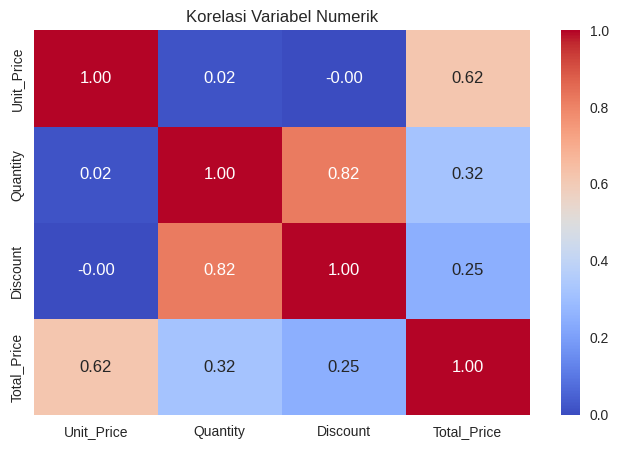

In [12]:
# Periksa hubungan antara variabel dengan matriks korelasi dan visualisasi dengan heatmap pada data numerik
plt.figure(figsize=(8, 5))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Variabel Numerik")
plt.show()



> **Insight**


1.   Hubungan antar variabel kuat, terlihat sebagian besar nilai confusion matrix mendekati 1 yang artinya menunjukkan bahwa adanya hubungan kuat antara variabel dalam dataset ini.

2.   Unit_Price dan Total_Price

    *   Nilai korelasi sebesar 0.62, menunjukkan korelasi/hubungan bernilai positif kuat.
    *   Semakin mahal harga satuan produk, maka semakin mahal pula harga total produk yang dibeli.
3.   Quantity dan Total_Price
    *   Nilai korelasi sebesar 0.32 , ini menunjukkan korelasi/hubungan bernilai positif.
    *   Semakin banyak jumlah produk, maka semakin banyak pula total harga produk yang dibeli.
4.   Discount dan Quantity
    *   Nilai korelasi sebesar 0.82, menunjukkan hubungan positif sangat kuat.
    *   Semakin banyak jumlah produk yang dibeli, maka semakin banyak pula diskon yang didapatkan.
5. Total_Price dan Discount
    *   Nilai korelasi sebesar 0.25, menunjukkan hubungan positif namun cenderung lemah.
    *   Semakin banyak total harga produk yang dibeli, maka cenderung diskon yang didapatkan juga lebih besar.
6.   Quantity dan Unit_Price
    *   Nilai korelasi sebesar 0.1, menunjukkan korelasi positif namun sangat rendah(mendekati 0), yang berarti bahwa jumlah produk tidak memiliki hubungan yang signifikan dengan banyaknya harga satuan produk.

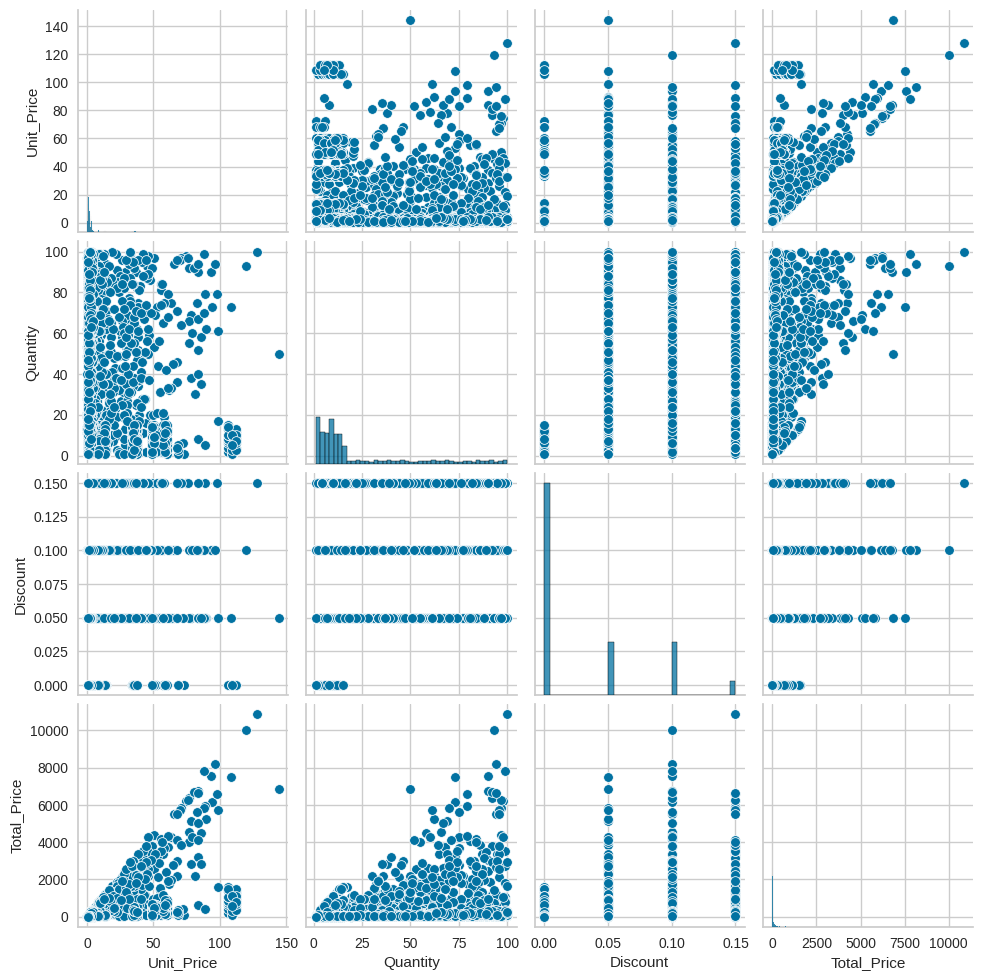

In [13]:
# Memeriksa hubungan antara variabel dengan pairplot pada data numerik
sns.pairplot(df[numerical_cols])
plt.show()

Pairplot diatas menyajikan grafik scatter plot untuk setiap pasangan fitur numerik yang memungkinkan visualisasi hubungan antara fitur-fitur tersebut. Selain itu, diagonal pairplot menampilkan histogram dari distribusi masing-masing fitur.
Dengan cara ini, pairplot membantu dalam mengidentifikasi pola, korelasi, dan distribusi di antara fitur-fitur numerik, serta mendeteksi potensi outlier atau hubungan non-linier yang mungkin ada.



> **4. Visualisasi Data**



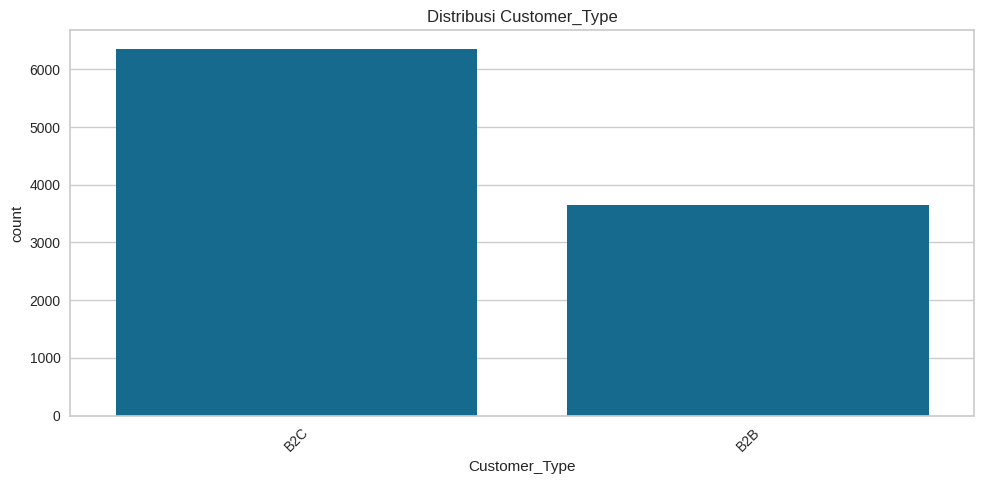

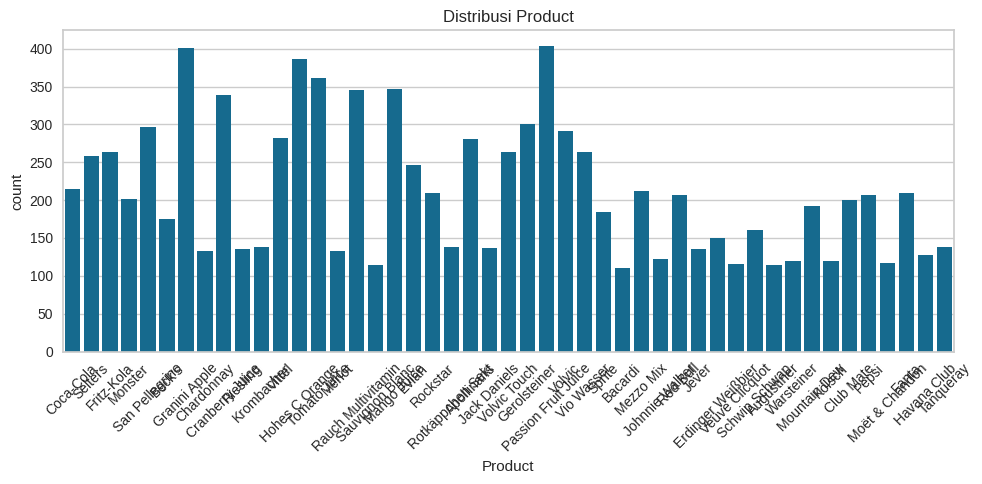

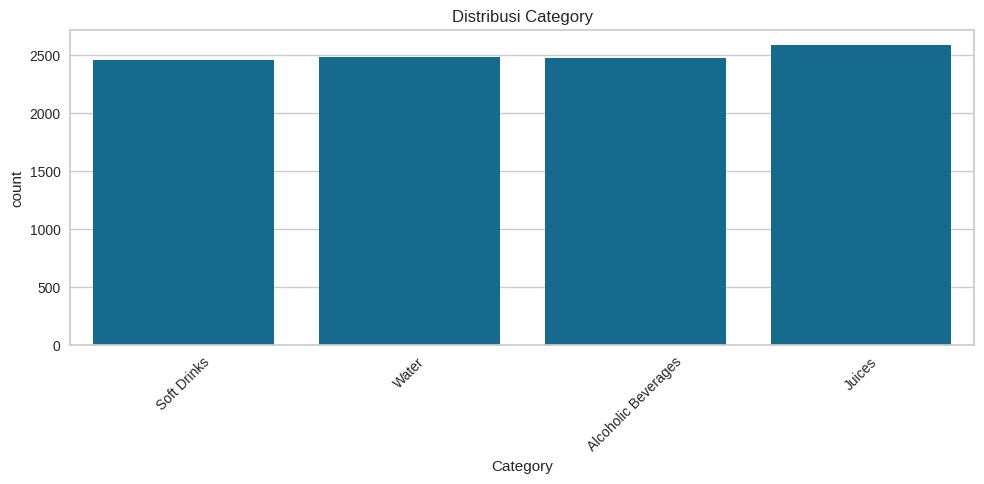

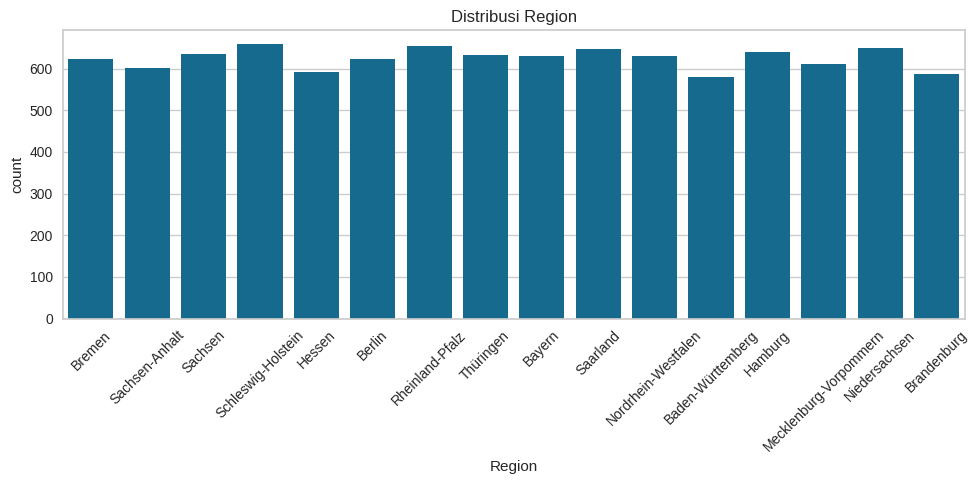

In [14]:
# Data kolom kategorikal
categorical_cols = ['Customer_Type', 'Product', 'Category', 'Region']

# Visualisasi distribusi data kategorikal
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



> **Insight**
1.   Customer_Type
    * Customer yang melakukan B2C jaub lebih banyak dibanding customer  yang melakukan B2B.
2.   Product
    * Distribusi produk yang terjual terlihat cukup bervariasi, namun ada beberapa produk yang mendominasi.
3.   Category
    * Distribusi Category menunjukkan kategori minuman yang lebih laris terjual yaitu Water, kemudian disusul Alcoholic Beverages, Juices, dan Soft Drink, dimana jumlah yang hampir seimbang dengan perbedaan tipis dari tiap kategori minumam.  
4.   Region
    * Distribusi Region terlihat cukup bervariasi, dengan jumlah yang hampir seimbang ditiap wilayah.



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.



> **1. Menghapus atau menangani Data Kosong**



In [15]:
# Cek data kosong
print("Jumlah data kosong per kolom:")
df.isnull().sum()

Jumlah data kosong per kolom:


,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0




> **Insight**

Tidak ditemukan missing values pada variabel-variabel dataset ini, sehingga tidak perlu melakukan analisis lebih lanjut.




> **2. Menghapus Data Duplikat**



In [16]:
# Cek data duplikat
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0




> **Insight**

Tidak ditemukan adanya data yang duplicat, sehingga tidak perlu melakukan analisis lebih lanjut.




> **3. Normalisasi atau Standarisasi Fitur**



In [17]:
# Inisialisasi fungsi normalisasi dan standarisasi
min_max_scaler = MinMaxScaler() # normalisasi
standard_scaler = StandardScaler() # standarisasi

In [18]:
# Normalisasi data
df_normalized = df.copy()
df_normalized[['Quantity', 'Unit_Price', 'Total_Price']] = min_max_scaler.fit_transform(df_normalized[['Quantity', 'Unit_Price', 'Total_Price']])
df_normalized.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,0.004926,0.060606,0.00,0.000635,Bremen,2021-02-17
1,ORD1118443,CUS7797,B2B,Selters,Water,0.002636,0.454545,0.10,0.002672,Sachsen-Anhalt,2023-04-15
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,0.017830,0.727273,0.05,0.018486,Sachsen,2022-06-20
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,0.016304,0.292929,0.05,0.006999,Schleswig-Holstein,2021-09-07
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.004024,0.020202,0.00,0.000216,Hessen,2023-04-28
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,0.007493,0.030303,0.00,0.000484,Bremen,2023-11-01
6,ORD727051,CUS1935,B2C,San Pellegrino,Water,0.003677,0.020202,0.00,0.000203,Berlin,2021-02-23
7,ORD2154629,CUS3548,B2C,Granini Apple,Juices,0.009088,0.050505,0.00,0.000871,Rheinland-Pfalz,2022-04-16
8,ORD2893537,CUS155,B2B,Chardonnay,Alcoholic Beverages,0.060982,0.171717,0.05,0.014327,Thüringen,2023-04-29
9,ORD1007101,CUS762,B2C,Cranberry Juice,Juices,0.022409,0.131313,0.00,0.004555,Bayern,2022-11-10




> **4. Deteksi dan Penanganan Outlier**



In [19]:
# Menghitung Q1, Q3, dan IQR hanya untuk kolom numerik
Q1 = df_normalized[numerical_cols].quantile(0.25)
Q3 = df_normalized[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

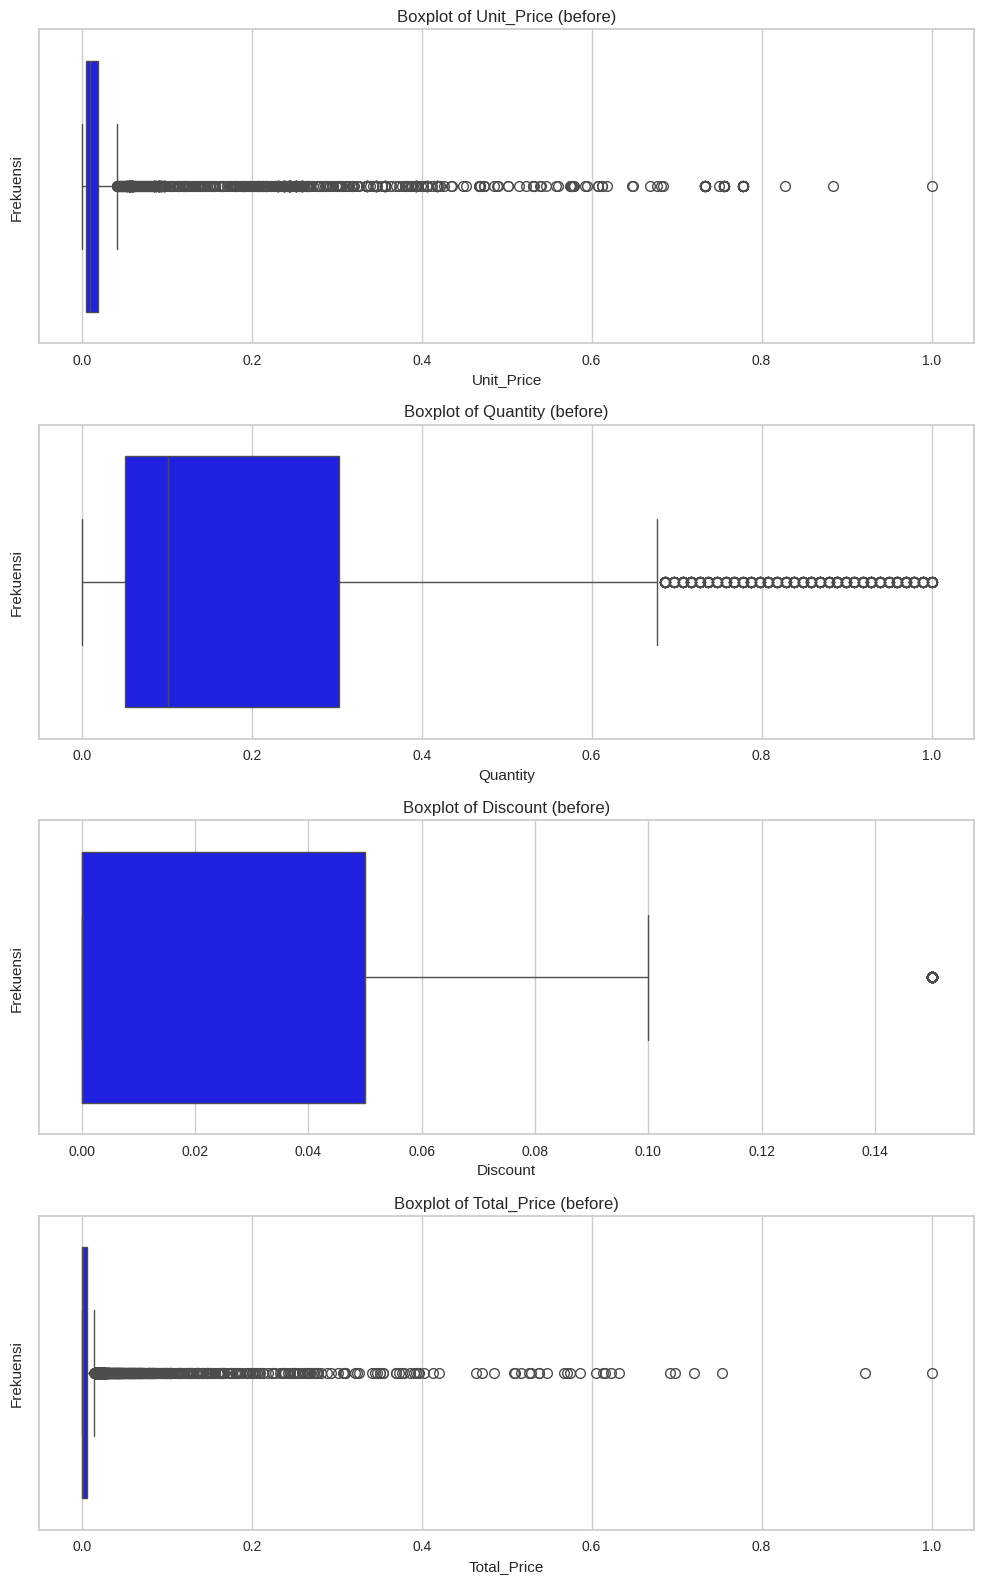

Jumlah data sebelum menghapus outlier: 10000


In [20]:
# Membuat subplots dalam 1 kolom dan jumlah baris sesuai dengan panjang numerical_cols
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, len(numerical_cols) * 4))

# Menampilkan boxplot sebelum menghapus outlier
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_normalized[col],  color='blue', ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} (before)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

print("Jumlah data sebelum menghapus outlier:", df_normalized.shape[0])

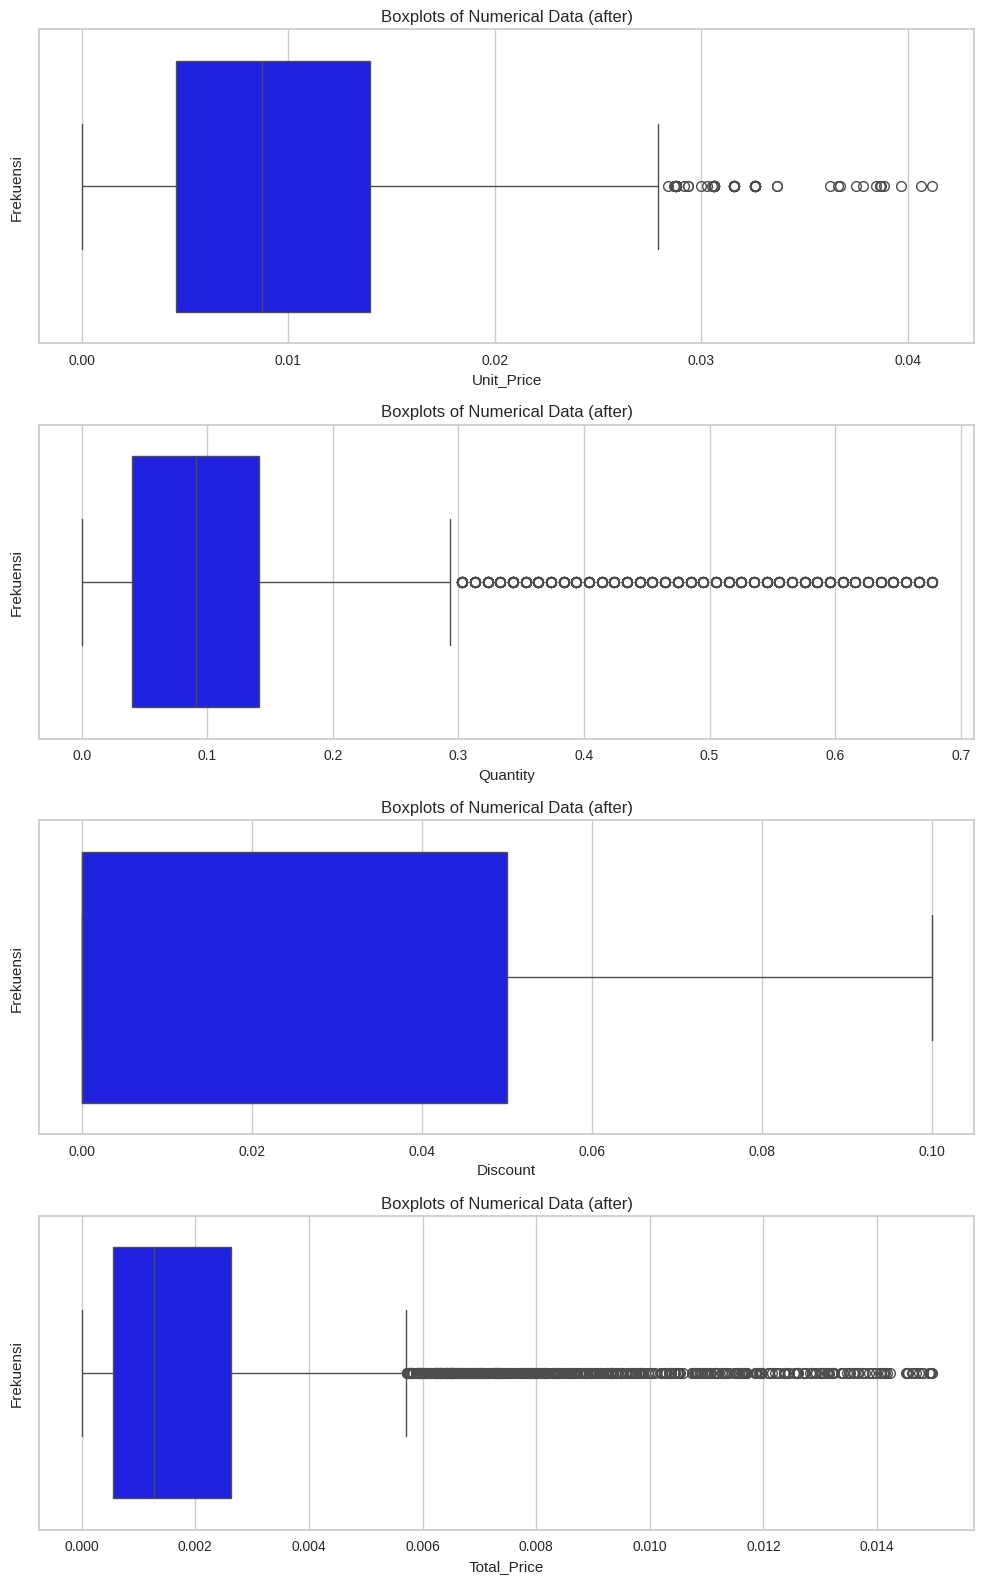

Jumlah data setelah menghapus outlier: 7585


In [21]:
# Menghapus data outlier pada kolom numerik
mask = ~((df_normalized[numerical_cols] < lower_bound) | (df_normalized[numerical_cols] > upper_bound)).any(axis=1)
df_cleaned = df_normalized[mask]

# Membuat subplots dalam 1 kolom dan jumlah baris sesuai dengan panjang numerical_cols
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, len(numerical_cols) * 4))

# Menampilkan boxplot setelah menghapus outlier
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_cleaned[col], color='blue', ax=axes[i])
    axes[i].set_title(f"Boxplots of Numerical Data (after)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()

print("Jumlah data setelah menghapus outlier:", df_cleaned.shape[0])



> **5. Encoding Data Kategorikal**



In [22]:
# Encoding fitur kategori
label_encoders = {}
df_encoded_categorical = df_cleaned[categorical_cols].copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_categorical[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le

df_encoded_categorical.head()

,Customer_Type,Product,Category,Region
0,1,5,2,4
1,0,32,3,13
3,0,20,2,14
4,1,29,3,6
5,1,2,0,4


In [23]:
# Hapus kolom kategorikal asli dari df_normalized agar tidak terjadi duplikasi kolom kategorikal
df_cleaned = df_cleaned.drop(columns=categorical_cols)

# Gabungkan hasil normalisasi numerik dan encoding kategorikal
df_preprocessed = pd.concat([df_cleaned, df_encoded_categorical], axis=1)

# Tampilkan hasil akhir
print("\nHasil Akhir Setelah Normalisasi dan Encoding:")
display(df_preprocessed.head(10))


Hasil Akhir Setelah Normalisasi dan Encoding:


,Order_ID,Customer_ID,Unit_Price,Quantity,Discount,Total_Price,Order_Date,Customer_Type,Product,Category,Region
0,ORD697566,CUS6363,0.004926,0.060606,0.00,0.000635,2021-02-17,1,5,2,4
1,ORD1118443,CUS7797,0.002636,0.454545,0.10,0.002672,2023-04-15,0,32,3,13
3,ORD1437128,CUS6393,0.016304,0.292929,0.05,0.006999,2021-09-07,0,20,2,14
4,ORD562794,CUS4090,0.004024,0.020202,0.00,0.000216,2023-04-28,1,29,3,6
5,ORD2320519,CUS5936,0.007493,0.030303,0.00,0.000484,2023-11-01,1,2,0,4
6,ORD727051,CUS1935,0.003677,0.020202,0.00,0.000203,2021-02-23,1,29,3,2
7,ORD2154629,CUS3548,0.009088,0.050505,0.00,0.000871,2022-04-16,1,12,1,10
9,ORD1007101,CUS762,0.022409,0.131313,0.00,0.004555,2022-11-10,1,6,1,1
11,ORD1686538,CUS7279,0.027681,0.131313,0.00,0.005535,2023-09-15,1,26,0,11
13,ORD1270824,CUS1272,0.008742,0.111111,0.00,0.001722,2021-10-27,1,12,1,14


In [24]:
df_preprocessed.duplicated().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.



> **1. Memilih Algoritma yang sesuai**



In [25]:
# Pastikan df_preprocessed hanya berisi data bertipe numerik
cols_to_clustering = ['Unit_Price',	'Quantity',	'Discount',	'Total_Price', 'Customer_Type']
X = df_preprocessed[cols_to_clustering]
X

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type
0,0.004926,0.060606,0.00,0.000635,1
1,0.002636,0.454545,0.10,0.002672,0
3,0.016304,0.292929,0.05,0.006999,0
4,0.004024,0.020202,0.00,0.000216,1
5,0.007493,0.030303,0.00,0.000484,1
...,...,...,...,...,...
9994,0.009297,0.393939,0.10,0.005502,0
9996,0.009852,0.141414,0.00,0.002382,1
9997,0.005758,0.000000,0.00,0.000072,1
9998,0.004648,0.171717,0.05,0.001540,0


In [26]:
# Kurangi dimensi data menjadi 2 denga menggunakan PCA agar mudah untuk memvisualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [27]:
# algoritma Kmeans dengan looping untuk mencari k(jumlah kluster) dengan nilai silhouette
cluster_range = range(2, 10)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)
    silhouette_scores.append(sil_score)
    print(f"K-Means Clustering with K={k} - Silhouette Score: {sil_score:.2f}")

K-Means Clustering with K=2 - Silhouette Score: 0.91
K-Means Clustering with K=3 - Silhouette Score: 0.86
K-Means Clustering with K=4 - Silhouette Score: 0.86
K-Means Clustering with K=5 - Silhouette Score: 0.62
K-Means Clustering with K=6 - Silhouette Score: 0.62
K-Means Clustering with K=7 - Silhouette Score: 0.62
K-Means Clustering with K=8 - Silhouette Score: 0.60
K-Means Clustering with K=9 - Silhouette Score: 0.59


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

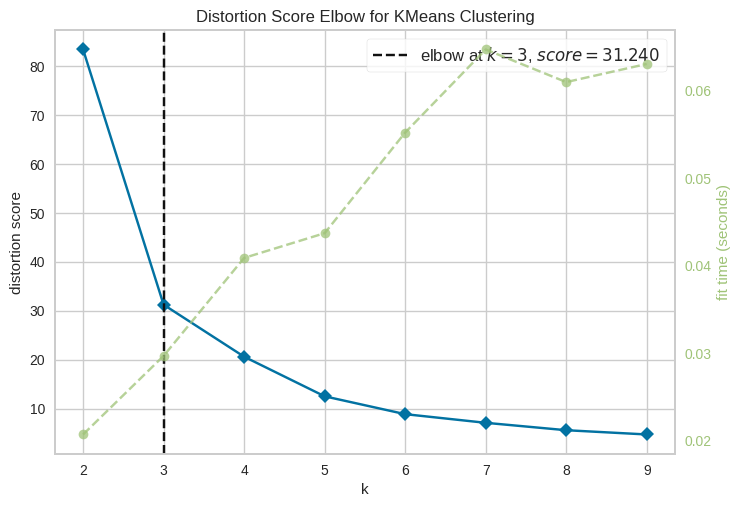

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Menggunakan elbow method untuk menentukan jumlah kluster terbaik
kmeans_elbow = KMeans(random_state=0, n_init=10)

# Membuat visualisasi Elbow dengan range k dari 2 hingga 10
visualizer = KElbowVisualizer(kmeans_elbow, k=(2, 10))

# Melatih visualizer dengan data X
visualizer.fit(X)

# Menampilkan hasil visualisasi
visualizer.show()

In [29]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
kmeans.fit(X_pca)

KMeans(n_clusters=np.int64(3), random_state=42)

In [30]:
# Aplikasikan nilai K optimal sesuai elbow method menggunakan Kmeans algorithm
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=20, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# evaluasi silhoutte score
sil_score = silhouette_score(X_pca, kmeans_labels)
print(f"Optimal K-Means Silhouette Score: {sil_score:.2f}")

Optimal K-Means Silhouette Score: 0.86


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
# Inisialisasi model KMeans dengan jumlah cluster optimal dari Elbow Method
labels_pca = kmeans.labels_

# Menghitung Silhouette Score untuk model dengan data hasil PCA
score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score dengan feature selection (PCA): {score_pca:.3f}")

# Membandingkan dengan performa model asli (tanpa PCA)
score_original = sil_score  # Silhouette Score model asli
print(f"Silhouette Score model asli: {score_original:.3f}")


Silhouette Score dengan feature selection (PCA): 0.863
Silhouette Score model asli: 0.863


In [32]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

score_dbscan = silhouette_score(X_pca, labels_dbscan)
print(f"Silhouette Score dengan DBSCAN: {score_dbscan:.3f}")

Silhouette Score dengan DBSCAN: 0.910


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

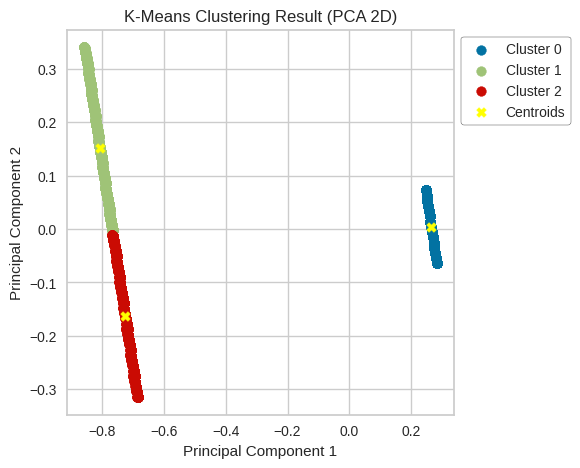

In [33]:
# Visualisasi data berdasarkan cluster
plt.figure(figsize=(5, 5))  #Membuat figure dengan ukuran 5x5 (untuk kontrol ukuran plot)

# Loop untuk memvisualisasikan data di setiap cluster (ada 3 cluster: 0, 1, 2) berdasarkan hasil k optimal
for i in range(3):
    # Memplot data pada cluster ke-i (di mana label cluster dari K-Means adalah `i`)
    # X_pca[:, 0] mewakili komponen utama pertama (PC1), X_pca[:, 1] mewakili komponen utama kedua (PC2)
    # `label=f'Cluster {i}'` memberi label nama cluster (Cluster 0, Cluster 1, dst.)
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')

# Plot centroid dari setiap cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()



> **Insight**

Dari hasil pemodelan menunjukkan jumlah cluster yang optimal ada 3 dimana terdiri dari cluster 0, 1, dan 2. Dengan visualisasi diatas yang menunjukkan cluster 0 ditandai dengan warna biru, cluster 1 ditandai dengan warna hijau dan cluster 2 ditandai dengan warna merah.


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [34]:
df_preprocessed.head()

,Order_ID,Customer_ID,Unit_Price,Quantity,Discount,Total_Price,Order_Date,Customer_Type,Product,Category,Region
0,ORD697566,CUS6363,0.004926,0.060606,0.00,0.000635,2021-02-17,1,5,2,4
1,ORD1118443,CUS7797,0.002636,0.454545,0.10,0.002672,2023-04-15,0,32,3,13
3,ORD1437128,CUS6393,0.016304,0.292929,0.05,0.006999,2021-09-07,0,20,2,14
4,ORD562794,CUS4090,0.004024,0.020202,0.00,0.000216,2023-04-28,1,29,3,6
5,ORD2320519,CUS5936,0.007493,0.030303,0.00,0.000484,2023-11-01,1,2,0,4


In [35]:
# Menghapus fitur/kolom yang tidak relevan untuk clustering
irrelevant_columns = ['Order_ID', 'Customer_ID', 'Order_Date']
df_preprocessed.drop(columns=irrelevant_columns, errors='ignore', inplace=True)

In [36]:
# Tambahkan hasil clustering pada dataframe yang telah dilakukan normalisasi dan penanganan outlier
df_preprocessed = df_preprocessed.copy()
df_preprocessed['Cluster'] = kmeans.labels_
df_preprocessed.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region,Cluster
0,0.004926,0.060606,0.00,0.000635,1,5,2,4,0
1,0.002636,0.454545,0.10,0.002672,0,32,3,13,1
3,0.016304,0.292929,0.05,0.006999,0,20,2,14,2
4,0.004024,0.020202,0.00,0.000216,1,29,3,6,0
5,0.007493,0.030303,0.00,0.000484,1,2,0,4,0


In [37]:
# Re-fit atau ubah kembali data numerik menjadi sebelum dinormalisasi/distandarisasi
min_max_scaler.fit(df[['Unit_Price', 'Quantity', 'Total_Price']]) # Re-fit menggunakan dataframe asli

# Melakukan inverse transform
df_preprocessed[['Unit_Price', 'Quantity', 'Total_Price']] = min_max_scaler.inverse_transform(df_preprocessed[['Unit_Price', 'Quantity', 'Total_Price']])
df_preprocessed.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region,Cluster
0,1.04,7.0,0.00,7.28,1,5,2,4,0
1,0.71,46.0,0.10,29.39,0,32,3,13,1
3,2.68,30.0,0.05,76.38,0,20,2,14,2
4,0.91,3.0,0.00,2.73,1,29,3,6,0
5,1.41,4.0,0.00,5.64,1,2,0,4,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [38]:
# Mengembalikan data kategori yang telah di-encode ke label aslinya
for col in ['Customer_Type', 'Product', 'Category', 'Region']:
    df_preprocessed[col] = label_encoders[col].inverse_transform(df_preprocessed[col])


In [39]:
df_preprocessed.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type,Product,Category,Region,Cluster
0,1.04,7.0,0.00,7.28,B2C,Coca-Cola,Soft Drinks,Bremen,0
1,0.71,46.0,0.10,29.39,B2B,Selters,Water,Sachsen-Anhalt,1
3,2.68,30.0,0.05,76.38,B2B,Monster,Soft Drinks,Schleswig-Holstein,2
4,0.91,3.0,0.00,2.73,B2C,San Pellegrino,Water,Hessen,0
5,1.41,4.0,0.00,5.64,B2C,Beck's,Alcoholic Beverages,Bremen,0


Cluster
0    5630
2    1006
1     949
Name: count, dtype: int64 



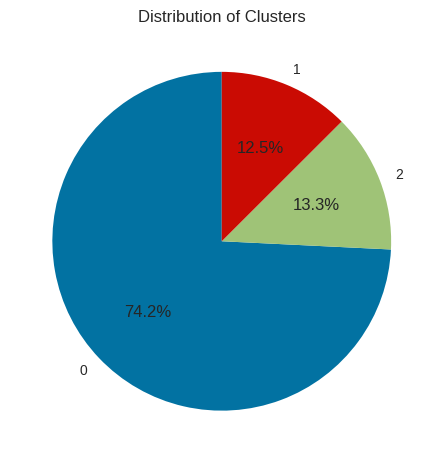

In [40]:
# Hitung jumlah data per kluster
cluster_count = df_preprocessed['Cluster'].value_counts()
print(cluster_count,'\n')

# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

In [41]:
# Cari rata-rata setiap cluster
df_preprocessed.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.862075,7.930018,0.000000,14.835064
1,1.539020,48.825079,0.076080,68.973656
2,1.605775,16.493042,0.061332,24.920199


Customer_Type   B2B   B2C
Cluster                  
0                 0  5630
1               949     0
2              1006     0 



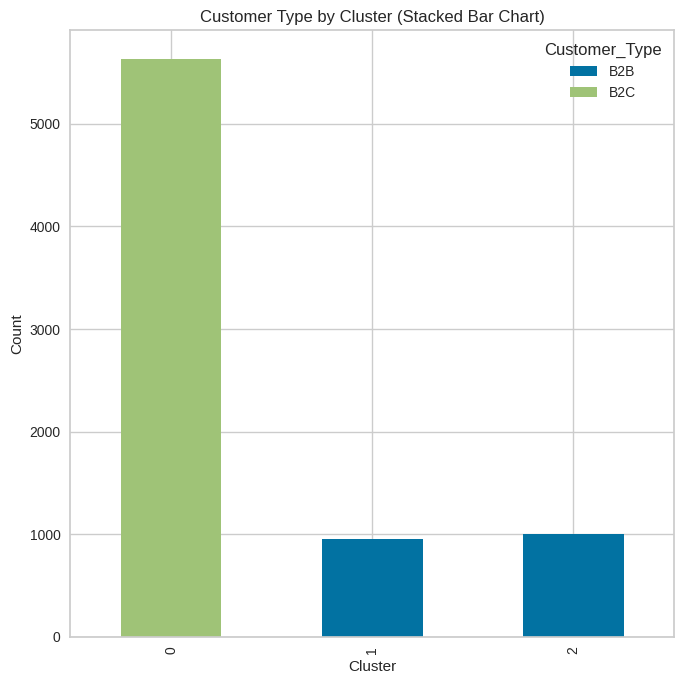

In [42]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type' dan hitung kemunculan datanya
customer_type_and_cluster_counts = df_preprocessed.groupby(['Cluster', 'Customer_Type']).size().unstack(fill_value=0)
print(customer_type_and_cluster_counts,'\n')

# Plot dengan bar chart
customer_type_and_cluster_counts.plot(kind='bar', stacked=True, figsize=(7, 7))
plt.title('Customer Type by Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Unit Price (Harga per unit):** 1.86  
- **Rata-rata Quantity (Jumlah Pembelian):** 7.93 unit
- **Rata-rata Discount (diskon (%)) :** 0 %
- **Rata-rata Total price (Harga Total ($)):** 14.83
- **Customer Type (Jenis Customer):** B2C atau Business to Consumer
- **Analisis:** Cluster ini mencakup pelanggan dengan pembelian dalam jumlah kecil dan tanpa mendapatkan diskon. Sehingga harga per unit yang didapatkan menjadi relatif tinggi dibanding kluster lainnya. Dengan total harga rendah, dan termasuk jenis pelanggan B2C, ini menunjukkan pelanggan dalam cluster ini cenderung memiliki daya beli yang rendah dan mereka mungkin merupakan pelanggan pemakai produk yang lebih cenderung untuk membeli produk untuk kebutuhan pribadi.

## Cluster 1
- **Rata-rata Unit Price (Harga per unit):** 1.53
- **Rata-rata Quantity (Jumlah Pembelian):** 48.82 unit
- **Rata-rata Discount (diskon (%)) :** 7.6 %
- **Rata-rata Total price (Harga Total ($)):** 68.97
- **Customer Type (Jenis Customer):** B2B atau Business to Business
- **Analisis:** Cluster ini mencakup pelanggan dengan pembelian dalam jumlah besar dan mendapatkan diskon yang besar, sehingga harga per unit yang didapatkan relatif lebih rendah. Dengan total harga yang cukup tinggi dan termasuk jenis pelanggan B2B, ini menunjukkan pelanggan dalam cluster ini merupakan kelompok premium dengan daya beli yang kuat dan mereka mungkin membeli untuk keberluan bisnis dimana menginginkan diskon sebagai faktor penting guna menghemat margin pengeluaran bisnis.

## Cluster 2:
- **Rata-rata Unit Price (Harga per unit):** 1.60
- **Rata-rata Quantity (Jumlah Pembelian):** 16.49 unit
- **Rata-rata Discount (diskon (%)) :** 6.13 %
- **Rata-rata Total price (Harga Total ($)):** 24.92
- **Customer Type (Jenis Customer):** B2B atau Business to Business
- **Analisis:** Cluster ini mencakup pelanggan dengan pembelian dalam jumlah moderat dan memperoleh diskon moderat (tidak tinggi maupun rendah), sehingga harga per unitnya menjadi sedikit lebih rendah dibanding cluster 0. Dengan harga total yang moderat dan jenis pelanggan menunjukkan pelanggan B2B, ini menunjukkan bahwa pelanggan dalam cluster ini mungkin terdiri dari mereka yang membeli untuk keperluan bisnis kecil hingga menengah dimana memiliki kecenderungan lebih sensitif terhadap harga dan memanfaatkan potongan harga yang tersedia.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
# Simpan dataframe ke dalam file CSV
df_preprocessed.to_csv('beverage_sales_clustered.csv', index=False)